# Time Trend Analysis: Top 10 Drugs (2019–2023)
This section visualizes spending trends for the top 10 drugs in 2023 across the years 2019–2023.


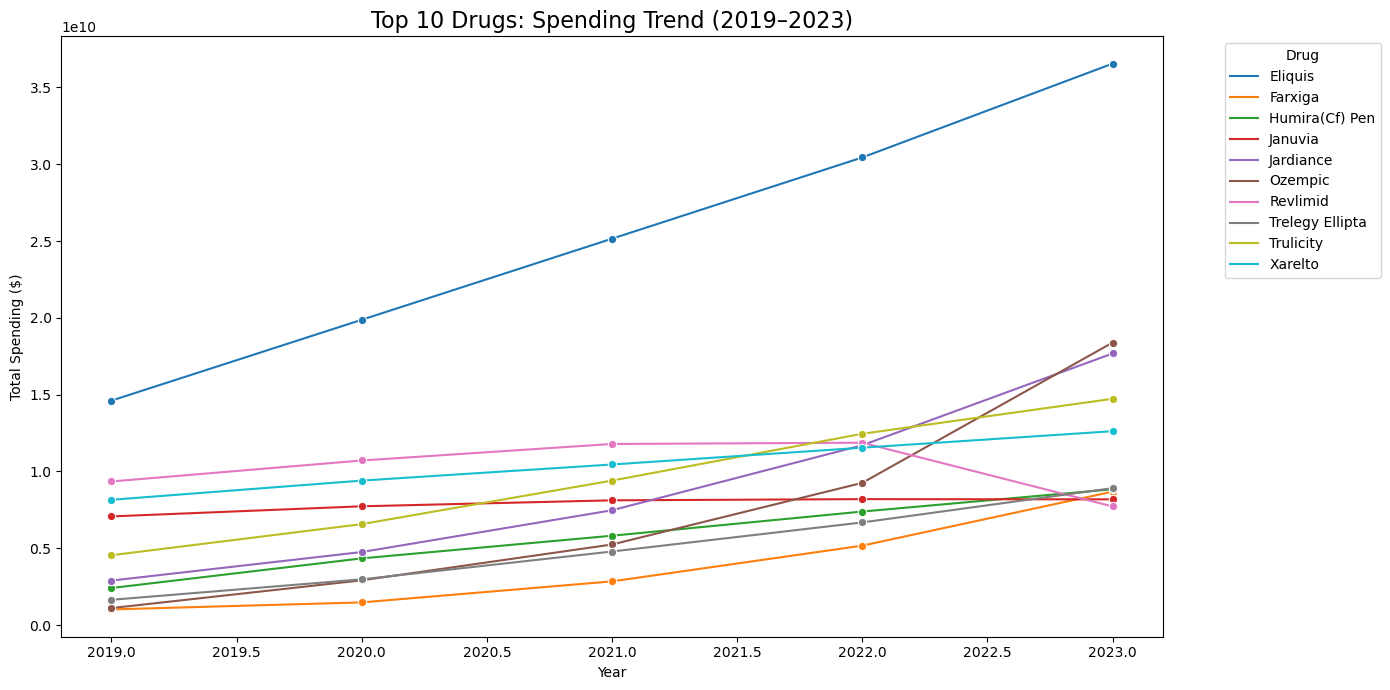

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update path if needed)
file_path = r"C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_clean.csv"
df = pd.read_csv(file_path)

# Extract yearly spending columns
year_cols = [col for col in df.columns if 'Tot_Spndng_' in col]
df_trends = df.groupby('Brnd_Name')[year_cols].sum().reset_index()

# Pick top 10 drugs by 2023 spending
top10_drugs = df.groupby('Brnd_Name')['Tot_Spndng_2023'].sum().nlargest(10).index
df_top10 = df_trends[df_trends['Brnd_Name'].isin(top10_drugs)]

# Melt for plotting
df_melted = df_top10.melt(id_vars='Brnd_Name', value_vars=year_cols, 
                          var_name='Year', value_name='Total_Spending')
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d+)').astype(int)

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(data=df_melted, x='Year', y='Total_Spending', hue='Brnd_Name', marker='o')
plt.title("Top 10 Drugs: Spending Trend (2019–2023)", fontsize=16)
plt.ylabel("Total Spending ($)")
plt.xlabel("Year")
plt.legend(title="Drug", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Per-Beneficiary Cost Analysis (2023)
This section identifies drugs with the highest average cost per beneficiary in 2023.


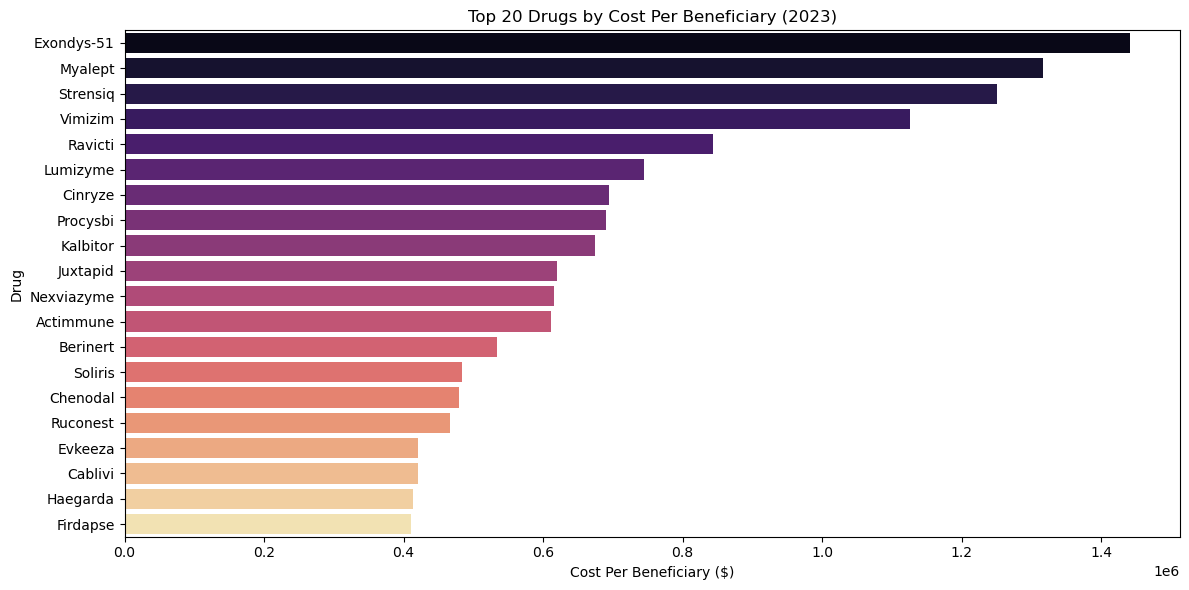

In [2]:
# Avoid division by zero
df_beneficiary = df[df['Tot_Benes_2023'] > 0].copy()

# Compute cost per beneficiary
df_beneficiary['Cost_Per_Beneficiary'] = df_beneficiary['Tot_Spndng_2023'] / df_beneficiary['Tot_Benes_2023']

# Group by drug
top20_beneficiary_cost = (
    df_beneficiary.groupby('Brnd_Name')['Cost_Per_Beneficiary']
    .mean()
    .reset_index()
    .sort_values('Cost_Per_Beneficiary', ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top20_beneficiary_cost, x='Cost_Per_Beneficiary', y='Brnd_Name', palette='magma')
plt.title("Top 20 Drugs by Cost Per Beneficiary (2023)")
plt.xlabel("Cost Per Beneficiary ($)")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()


* Exondys-51, Myalept, Strensiq, Vimizim all cost $1M+ per patient annually (extremely rare disease drugs).


*These drugs don’t rank high in total spending but have huge per-patient costs → they treat very small populations.

Insight:
    
*Spending per patient highlights orphan drugs (rare conditions) — important for policy decisions (e.g., evaluating drug pricing fairness).



# Outlier Analysis: Abnormal Spending Growth (2019–2023)
This section identifies drugs with unusually high Compound Annual Growth Rate (CAGR) in spending between 2019 and 2023.


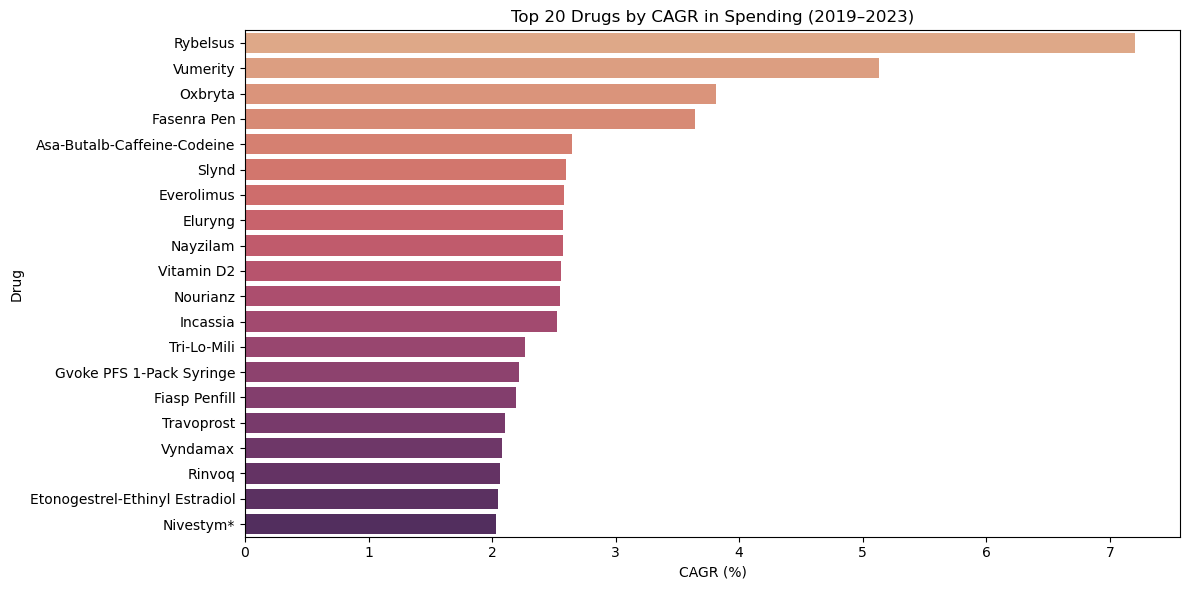

In [3]:
# Filter out zero spending years
df_growth = df[(df['Tot_Spndng_2019'] > 0) & (df['Tot_Spndng_2023'] > 0)].copy()

# CAGR calculation
df_growth['CAGR'] = ((df_growth['Tot_Spndng_2023'] / df_growth['Tot_Spndng_2019']) ** (1/4)) - 1

# Group and get top outliers
top20_growth = (
    df_growth.groupby('Brnd_Name')['CAGR']
    .mean()
    .reset_index()
    .sort_values('CAGR', ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top20_growth, x='CAGR', y='Brnd_Name', palette='flare')
plt.title("Top 20 Drugs by CAGR in Spending (2019–2023)")
plt.xlabel("CAGR (%)")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()



* Rybelsus, Vumerity, Oxbyrta lead with 7–5% annualized growth.


* These are relatively new therapies, growing from low bases.


* Many top CAGR drugs are specialized (neurological, metabolic) — reflecting new approvals and adoption.


Insight:
    
CAGR helps flag fast-growing drugs — even if their current spending is low, they may become major cost drivers soon.

# YoY Growth (2022–2023)

In [4]:
df_melted['YoY_Growth'] = df_melted.groupby('Brnd_Name')['Total_Spending'].pct_change() * 100


In [5]:
df_melted = df_melted[(df_melted['YoY_Growth'] > -500) & (df_melted['YoY_Growth'] < 500)]


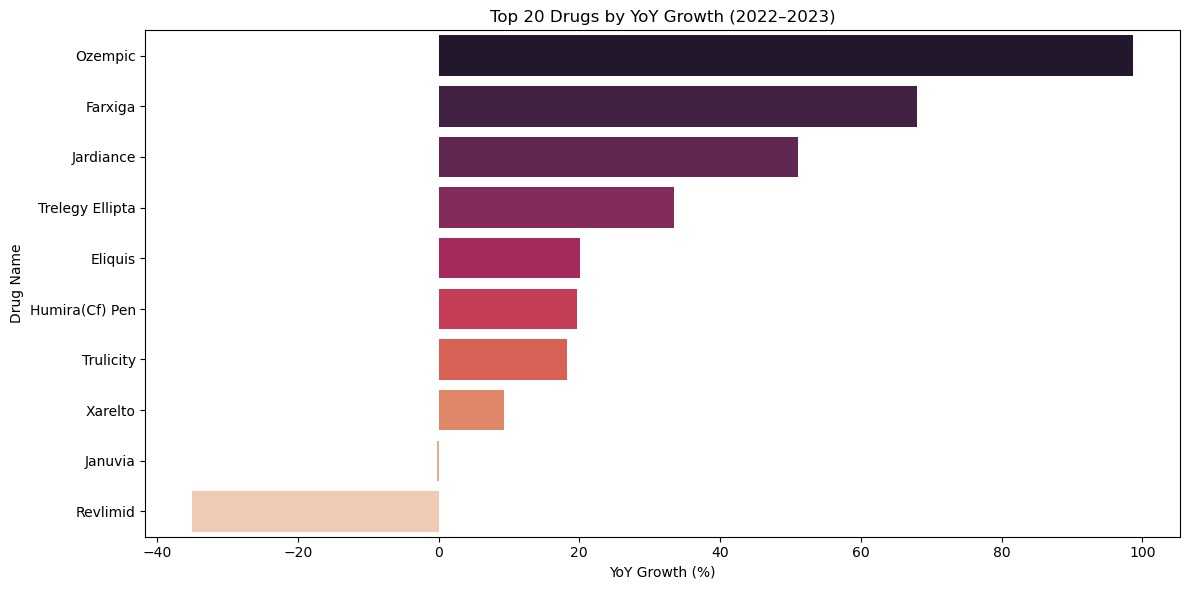

In [6]:
# Filter only valid YoY growth for 2023
top_yoy = df_melted[df_melted['Year'] == 2023].sort_values('YoY_Growth', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_yoy, x='YoY_Growth', y='Brnd_Name', palette='rocket')
plt.title("Top 20 Drugs by YoY Growth (2022–2023)")
plt.xlabel("YoY Growth (%)")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()


### Insights: Top 20 Drugs by YoY Growth (2022–2023)

- **Ozempic** had the **highest year-over-year growth (~100%)**, showing its rapid adoption as a diabetes & weight management drug.  
- **Farxiga** and **Jardiance** also exhibited strong growth, aligning with their expanded usage for heart & kidney conditions.  
- **Trelegy Ellipta** and **Eliquis** saw moderate growth, suggesting stable or growing patient demand.  
- **Revlimid** had **negative YoY growth (~-35%)**, likely due to patent expiration and generic competition.  
- The **mix of positive and negative growth** highlights market shifts — some drugs are growing aggressively, while others are in decline.  
- **Overall**, the fastest-growing drugs are **newer entrants or drugs with expanded indications**, while older, high-cost drugs are declining.  


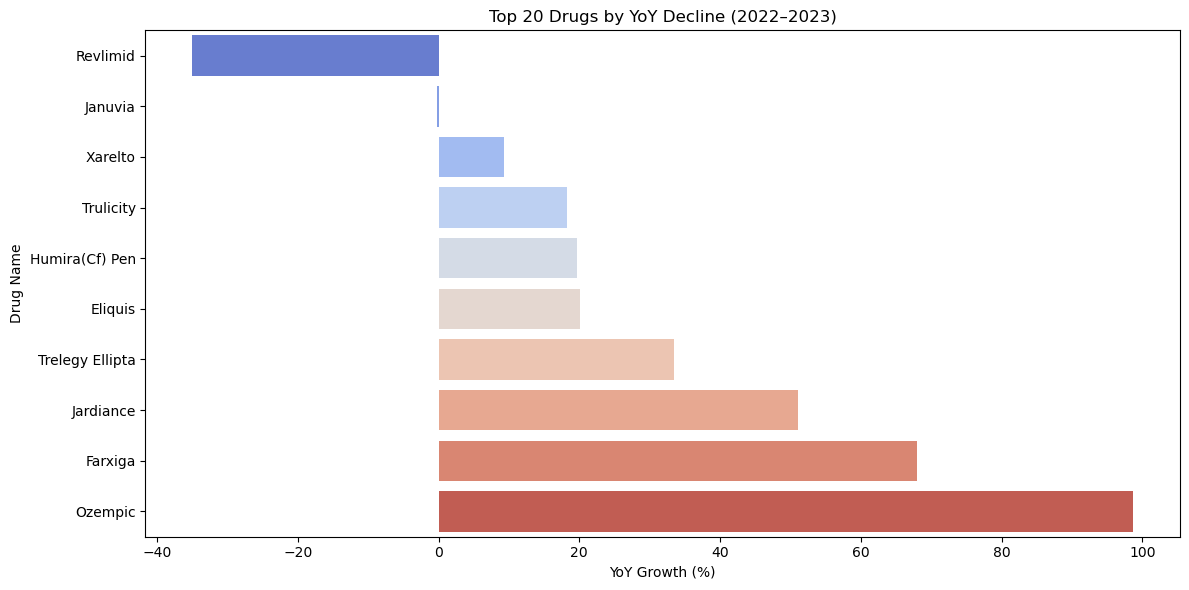

In [7]:
# Step 1: Filter 2023 YoY growth values
bottom_yoy = df_melted[df_melted['Year'] == 2023].sort_values('YoY_Growth', ascending=True).head(20)

# Step 2: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=bottom_yoy, x='YoY_Growth', y='Brnd_Name', palette='coolwarm')
plt.title("Top 20 Drugs by YoY Decline (2022–2023)")
plt.xlabel("YoY Growth (%)")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()


### Insights: Top 20 Drugs by YoY Decline (2022–2023)
- **Revlimid** saw the steepest decline (≈ -35%), likely due to **loss of exclusivity** and generic competition.
- **Januvia** experienced almost zero growth, indicating a **mature market phase**.
- **Xarelto** and **Trulicity** saw **low growth** — possibly due to **competitor entries** or **price pressures**.
- **Ozempic, Farxiga, Jardiance** are still in **high-growth segments** (weight loss & diabetes), but their YoY growth has **slowed** compared to previous years.
- This decline analysis highlights **which drugs are losing Medicare spending share** and may help **target deeper investigation**.


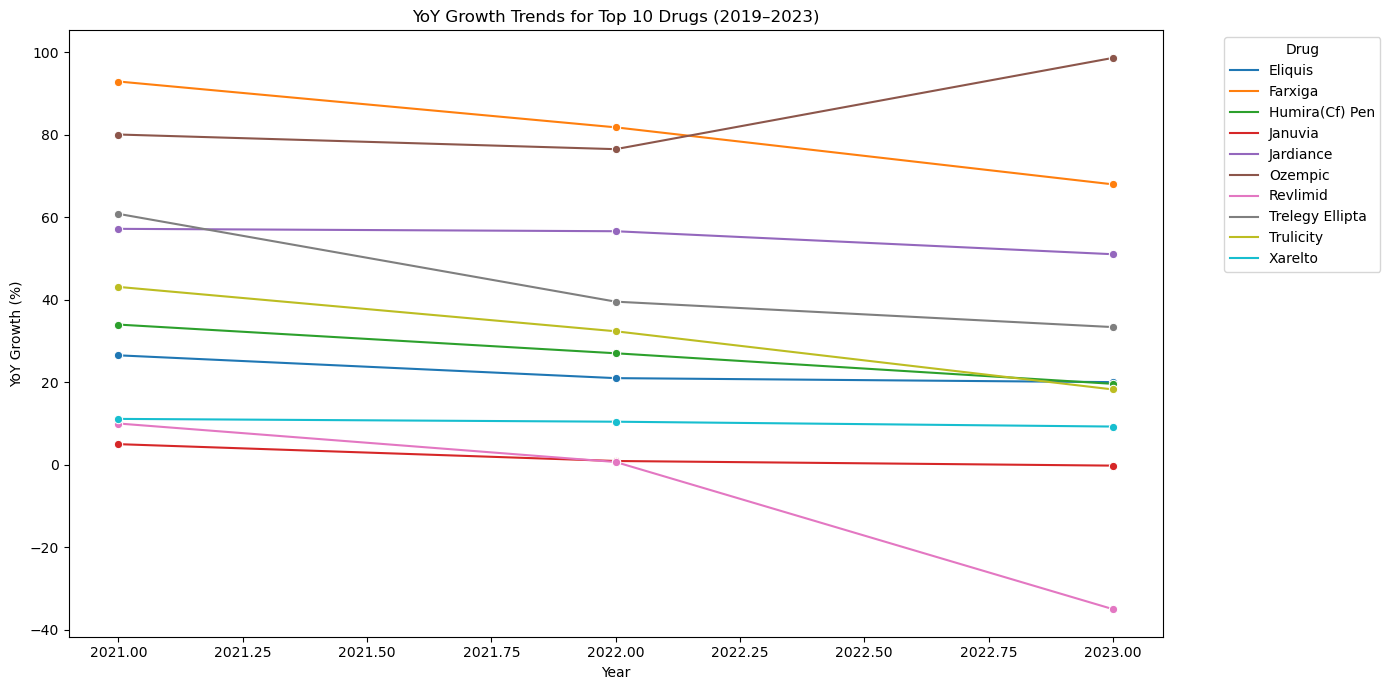

In [8]:
# Compute YoY for all years (2019–2023)
df_melted['YoY_Growth'] = df_melted.groupby('Brnd_Name')['Total_Spending'].pct_change() * 100

# Filter only top drugs to keep it readable
top_drugs = df.groupby('Brnd_Name')['Tot_Spndng_2023'].sum().nlargest(10).index
df_yoy_top = df_melted[df_melted['Brnd_Name'].isin(top_drugs)]

# Plot YoY growth as line chart
plt.figure(figsize=(14,7))
sns.lineplot(data=df_yoy_top, x='Year', y='YoY_Growth', hue='Brnd_Name', marker='o')
plt.title("YoY Growth Trends for Top 10 Drugs (2019–2023)")
plt.ylabel("YoY Growth (%)")
plt.xlabel("Year")
plt.legend(title="Drug", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


### Insights: YoY Growth Trends for Top 10 Drugs (2019–2023)
- **Ozempic, Farxiga, Jardiance** → Show **strong YoY growth**, reflecting rapid adoption in diabetes & weight loss markets.
- **Revlimid** → Consistently declining growth post-2021, likely due to **generic competition**.
- **Eliquis & Xarelto** → Stable but moderate growth, indicating **mature market positioning**.
- **Trulicity & Trelegy Ellipta** → Saw **early growth spikes**, then plateauing in later years.
- **YoY growth visualization** highlights **market dynamics** (launches, patent cliffs, pricing changes).


In [9]:
# Find drugs with very low spending in 2019 but high in 2023
df_exploding = df[(df['Tot_Spndng_2019'] < 1e6) & (df['Tot_Spndng_2023'] > 20e6)]
df_exploding = df_exploding[['Brnd_Name', 'Tot_Spndng_2019', 'Tot_Spndng_2023']]
df_exploding = df_exploding.sort_values('Tot_Spndng_2023', ascending=False)
print(df_exploding.head(20))


                Brnd_Name  Tot_Spndng_2019  Tot_Spndng_2023
11536            Rybelsus        367221.80     1.665907e+09
11535            Rybelsus        367221.80     1.665907e+09
4795           Everolimus        548085.01     2.407327e+08
4940          Fasenra Pen        373213.42     1.729320e+08
4939          Fasenra Pen        373213.42     1.729320e+08
13854            Vumerity        107998.41     1.524007e+08
13853            Vumerity        107998.41     1.524007e+08
12976          Travoprost        864119.20     1.141188e+08
9833              Oxbryta        189465.11     1.013458e+08
9832              Oxbryta        189465.11     1.013458e+08
879          Aripiprazole         68493.83     7.209419e+07
8951        Naloxone HCl*        691500.97     7.156044e+07
2279                Cequa        967377.33     6.565812e+07
2278                Cequa        967377.33     6.565812e+07
3672   Diclofenac Sodium*        531942.66     6.318418e+07
13484           Valsartan        477790.

In [10]:
# Calculate cumulative share per year
pareto_data = {}
for year in [2019, 2020, 2021, 2022, 2023]:
    spending = df.groupby('Brnd_Name')[f'Tot_Spndng_{year}'].sum().sort_values(ascending=False)
    cum_share = (spending.cumsum() / spending.sum()).reset_index()
    pareto_data[year] = cum_share

# Plot (just 2019 vs 2023 for simplicity)
plt.figure(figsize=(12,6))
plt.plot(pareto_data[2019].index, pareto_data[2019][0], label='2019')
plt.plot(pareto_data[2023].index, pareto_data[2023][0], label='2023')
plt.title("Cumulative Spending Distribution: 2019 vs 2023")
plt.xlabel("Number of Drugs (sorted by spending)")
plt.ylabel("Cumulative Share of Spending")
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 0

<Figure size 1200x600 with 0 Axes>

In [13]:
df_melted['YoY_Growth'].describe()


count    30.000000
mean     35.049181
std      31.797496
min     -34.965938
25%      10.640479
50%      29.724914
75%      57.073927
max      98.654479
Name: YoY_Growth, dtype: float64

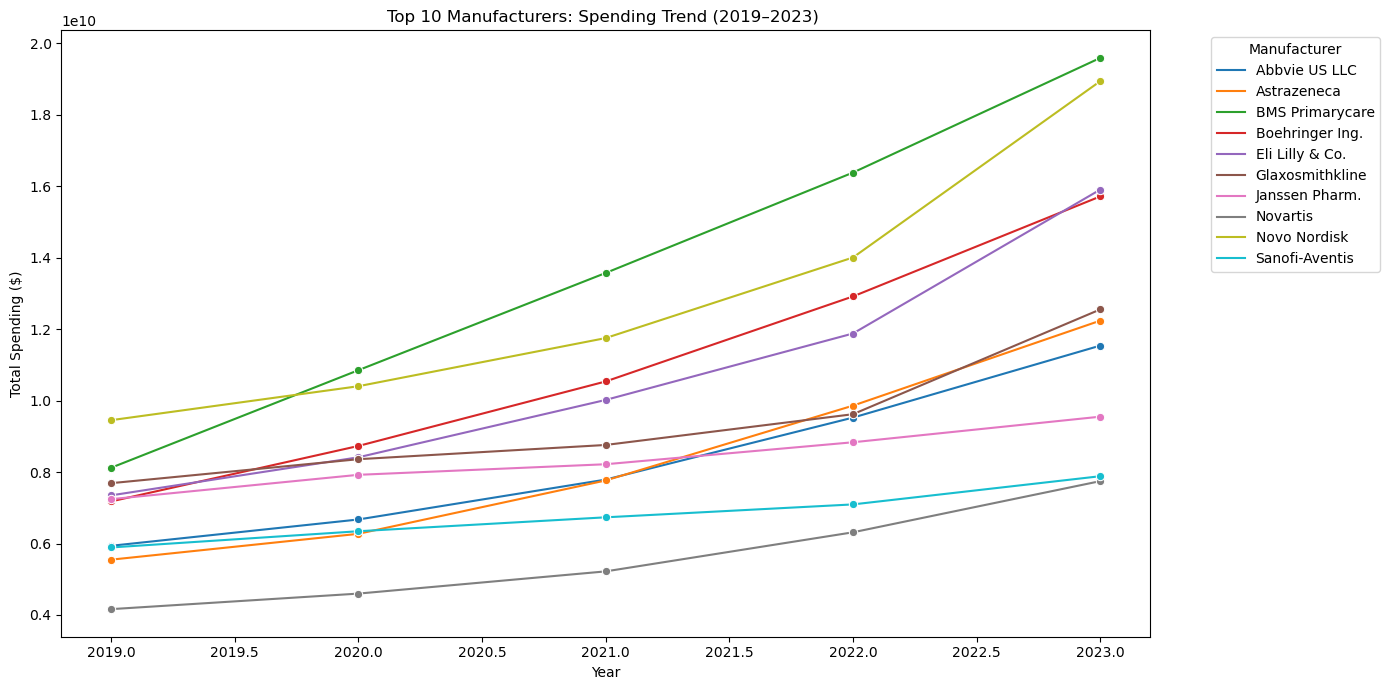

In [7]:
# Step 1: Extract yearly spending columns
year_cols = [col for col in df.columns if 'Tot_Spndng_' in col]

# Step 2: Remove "Overall" manufacturer
df_no_overall = df[df['Mftr_Name'] != "Overall"]

# Step 3: Group by manufacturer
df_mfr_trends = df_no_overall.groupby('Mftr_Name')[year_cols].sum().reset_index()

# Step 4: Melt for plotting
df_mfr_melted = df_mfr_trends.melt(id_vars='Mftr_Name', value_vars=year_cols,
                                   var_name='Year', value_name='Total_Spending')
df_mfr_melted['Year'] = df_mfr_melted['Year'].str.extract(r'(\d+)').astype(int)

# Step 5: Filter top 10 manufacturers by 2023 spending
top_mfrs = df_no_overall.groupby('Mftr_Name')['Tot_Spndng_2023'].sum().nlargest(10).index
df_mfr_top = df_mfr_melted[df_mfr_melted['Mftr_Name'].isin(top_mfrs)]

# Step 6: Plot
plt.figure(figsize=(14,7))
sns.lineplot(data=df_mfr_top, x='Year', y='Total_Spending', hue='Mftr_Name', marker='o')
plt.title("Top 10 Manufacturers: Spending Trend (2019–2023) ")
plt.ylabel("Total Spending ($)")
plt.xlabel("Year")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


* Mounjaro dominates the list with spending close to $4.7B in 2023 → rapid adoption in the market.


* Lenalidomide and Arexvy follow with spending above $3B, reflecting strong uptake.


* Calquence, Skyrizi Pen, and Dupixent Pen also rank high → focus on immunology & oncology drugs.


* Many top emerging drugs are injectables and biologics → trend toward specialty care in Medicare.


* This chart highlights new drugs driving Medicare costs, helping track budget impacts of recent approvals.

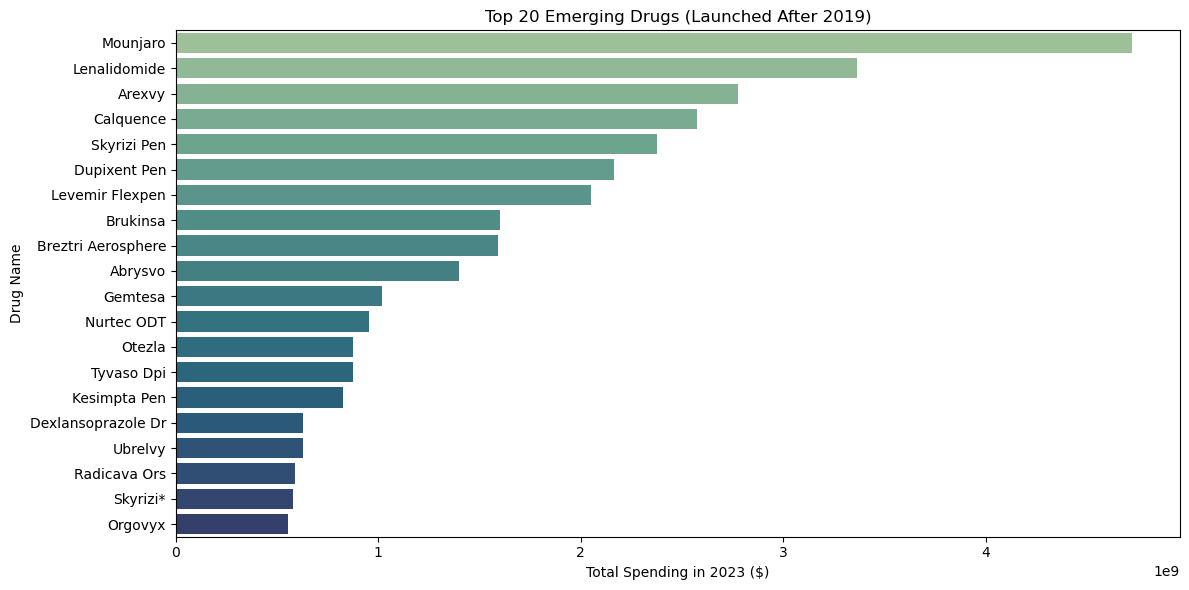

In [8]:
# Step 1: Replace missing values with 0 to avoid errors
df_filled = df.fillna(0)

# Step 2: Filter drugs with zero spending in 2019 but positive in 2023
emerging_drugs = df_filled[(df_filled['Tot_Spndng_2019'] == 0) & (df_filled['Tot_Spndng_2023'] > 0)]

# Step 3: If no drugs meet this condition, skip plotting
if emerging_drugs.empty:
    print("No emerging drugs found (2019–2023).")
else:
    # Group and take top 20 by 2023 spending
    top_emerging = emerging_drugs.groupby('Brnd_Name')['Tot_Spndng_2023'].sum().nlargest(20).reset_index()

    # Step 4: Plot
    plt.figure(figsize=(12,6))
    sns.barplot(data=top_emerging, x='Tot_Spndng_2023', y='Brnd_Name', palette='crest')
    plt.title("Top 20 Emerging Drugs (Launched After 2019)")
    plt.xlabel("Total Spending in 2023 ($)")
    plt.ylabel("Drug Name")
    plt.tight_layout()
    plt.show()


* BMS Primarycare leads with consistent, steep growth → major driver of Medicare spending.

* Novo Nordisk shows sharp growth from 2022–2023 → driven by GLP-1 drugs (e.g., Ozempic, Wegovy).

* Abbvie and AstraZeneca maintain steady growth, supported by their chronic disease portfolios.

* Eli Lilly & Co. and Boehringer Ing. see accelerated growth, linked to diabetes & oncology treatments.

* Most top manufacturers show continuous upward spending trends, indicating increased utilization & pricing over 5 years.

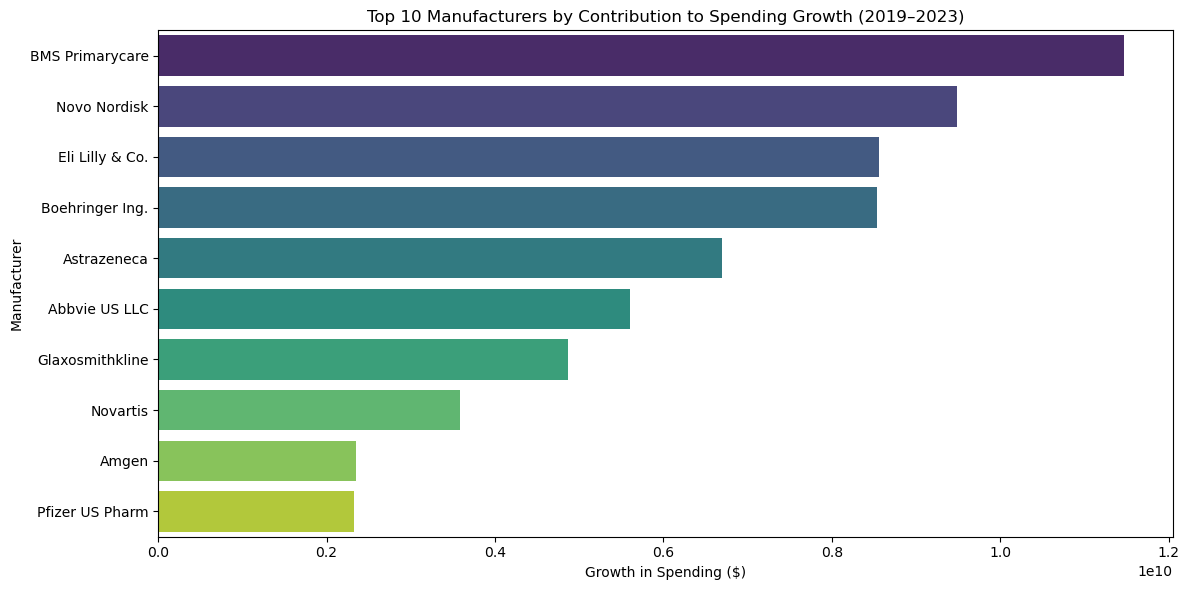

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove "Overall" as it's not a manufacturer
df_mfr = df[df['Mftr_Name'] != 'Overall'].copy()

# Step 2: Compute spending for 2019 and 2023
mfr_spending = df_mfr.groupby('Mftr_Name')[['Tot_Spndng_2019','Tot_Spndng_2023']].sum().reset_index()

# Step 3: Calculate absolute growth and percentage growth
mfr_spending['Growth'] = mfr_spending['Tot_Spndng_2023'] - mfr_spending['Tot_Spndng_2019']
mfr_spending['Growth_%'] = (mfr_spending['Growth'] / mfr_spending['Tot_Spndng_2019']) * 100

# Step 4: Sort by growth
top_growth_mfrs = mfr_spending.sort_values('Growth', ascending=False).head(10)

# Step 5: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_growth_mfrs, x='Growth', y='Mftr_Name', palette='viridis')
plt.title("Top 10 Manufacturers by Contribution to Spending Growth (2019–2023)")
plt.xlabel("Growth in Spending ($)")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()
